# How many racks overlap?

In [1]:
import geojson
import geopandas
import pandas as pd
from sklearn.cluster import DBSCAN
from IPython.display import clear_output
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display

In [2]:
with open("../Output Files/bicycle-parking-high-capacity-outdoor-normalized.geojson") as f:
  city_highcap_gj = geojson.load(f)

city_highcap = geopandas.GeoDataFrame.from_features(
  city_highcap_gj,
  crs=4326
)

with open("../Output Files/bicycle-parking-racks-normalized.geojson") as f:
  city_racks_gj = geojson.load(f)

city_racks = geopandas.GeoDataFrame.from_features(
  city_racks_gj,
  crs=4326
)

with open("../Output Files/street-furniture-bicycle-parking-normalized.geojson") as f:
  city_furniture_gj = geojson.load(f)

city_furniture = geopandas.GeoDataFrame.from_features(
  city_furniture_gj,
  crs=4326
)

# explode
city_highcap = city_highcap.explode(index_parts=False)
city_racks = city_racks.explode(index_parts=False)
city_furniture = city_furniture.explode(index_parts=False)

# filter
city_highcap = city_highcap[city_highcap['bicycle_parking'] == "rack"]
city_furniture = city_furniture[city_furniture['bicycle_parking'] == "rack"]

# add source field
city_highcap.insert(0, 'source', "bicycle-parking-high-capacity-outdoor")
city_racks.insert(0, 'source', "bicycle-parking-racks")
city_furniture.insert(0, 'source', "street-furniture-bicycle-parking")

# combine and keep duplicates
all_combined = pd.concat([city_highcap, city_racks, city_furniture])
duplicate_racks = all_combined[all_combined['geometry'].duplicated(keep=False)]

# combine and drop duplicates
city_combined = pd.concat([city_highcap, city_racks, city_furniture])
city_combined = city_combined.drop_duplicates('geometry')

## All Racks

In [47]:
m_all = all_combined.explore('source', cmap=['blue', 'red', 'green'], marker_kwds={'radius': 10}, style_kwds={'weight': 5})
# dir(m_all)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_children',
 '_env',
 '_get_self_bounds',
 '_id',
 '_name',
 '_parent',
 '_png_image',
 '_repr_html_',
 '_repr_png_',
 '_template',
 '_template_name',
 '_template_str',
 '_to_png',
 'add_child',
 'add_children',
 'add_to',
 'control_scale',
 'crs',
 'default_css',
 'default_js',
 'fit_bounds',
 'get_bounds',
 'get_name',
 'get_root',
 'global_switches',
 'height',
 'keep_in_front',
 'left',
 'location',
 'objects_to_stay_in_front',
 'options',
 'png_enabled',
 'position',
 'render',
 'save',
 'show_in_browser',
 'to_dict',
 'to_json',
 'top',
 'width']

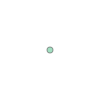

In [30]:
duplicate_racks.iloc[1]['geometry']

## Exact Duplicate GeoLocation Racks

In [ ]:
# duplicate_racks.explore('source', cmap=['blue', 'red', 'green'], marker_kwds={'radius': 10}, style_kwds={'weight': 5})

dupe_item = widgets.BoundedIntText(
    value=0,
    min=0,
    max=len(duplicate_racks['geometry'].unique()) - 1,
    step=1,
    description='Item:',
    disabled=False
)

m0 = all_combined.explore('source', cmap=['blue', 'red', 'green'], marker_kwds={'radius': 10}, style_kwds={'weight': 5})

groups = duplicate_racks['geometry'].unique()

group = None
def on_value_change(change):
    group = duplicate_racks[duplicate_racks['geometry'] == groups[dupe_item.value]]
    bounds = group.total_bounds.tolist()
    m = group.explore('source', cmap=['purple', 'orange', 'darkgreen'], marker_kwds={'radius': 10}, style_kwds={'weight': 5})
    clear_output(wait=True)
    url = f"https://www.google.com/maps/@{groups[dupe_item.value].y},{groups[dupe_item.value].x},18z"
    display(dupe_item, url, m, group.transpose(), m0)
    # for row in group.iterrows():
    #     display(row)

dupe_item.observe(on_value_change)
on_value_change(None)

BoundedIntText(value=9, description='Item:', max=101)

'https://www.google.com/maps/@43.665101,-79.412694,18z'

,10,83
source,bicycle-parking-high-capacity-outdoor,bicycle-parking-racks
amenity,bicycle_parking,bicycle_parking
bicycle_parking,rack,rack
capacity,8.0,8.0
operator,City of Toronto,City of Toronto
covered,None,no
access,yes,yes
fee,no,no
start_date,2017.0,NaN
length,2.9,NaN


In [14]:
city_combined_UTM17N = city_combined.to_crs(32617)

# cluster points
coordinates = city_combined_UTM17N["geometry"].get_coordinates().values
clusters = DBSCAN(eps=30.0, min_samples=2).fit(coordinates)
city_combined_UTM17N = city_combined_UTM17N.assign(cluster=clusters.labels_)

# remove non-clustered points
city_combined_UTM17N = city_combined_UTM17N[city_combined_UTM17N['cluster'] >= 0]

# remove clusters with only one data source
sources_per_cluster = dict(city_combined_UTM17N[['cluster', 'source']].groupby('cluster')['source'].unique().apply(lambda r: len(r)))
sources_per_cluster_test = city_combined_UTM17N['cluster'].apply(lambda c: sources_per_cluster[c] > 1)
city_combined_UTM17N = city_combined_UTM17N[sources_per_cluster_test]

## Close Proximity Racks

In [ ]:
item = widgets.BoundedIntText(
    value=0,
    min=0,
    max=len(city_combined_UTM17N['cluster'].unique()) - 1,
    step=1,
    description='Item:',
    disabled=False
)

clusters = city_combined_UTM17N['cluster'].unique()

unit = None
def on_value_change(change):
    unit = city_combined_UTM17N[city_combined_UTM17N['cluster'] == clusters[item.value]]
    m = unit.explore('source', cmap=['blue', 'red', 'green'], marker_kwds={'radius': 10}, style_kwds={'weight': 5})
    clear_output(wait=True)
    display(item, m, unit.transpose())
    # for row in unit.iterrows():
    #     display(row)

item.observe(on_value_change)
on_value_change(None)


BoundedIntText(value=2, description='Item:', max=14)

,23,9543
source,bicycle-parking-high-capacity-outdoor,street-furniture-bicycle-parking
amenity,bicycle_parking,bicycle_parking
bicycle_parking,rack,rack
capacity,14.0,NaN
operator,City of Toronto,City of Toronto
covered,None,no
access,yes,yes
fee,no,no
start_date,2015.0,NaN
length,5.5,NaN


In [53]:
city_combined_UTM17N.explore()